# Technical Proof Data Scientist

In [2]:
%matplotlib inline


# Librerías y paquetes necesarios


#Trtamiento de datos

import pandas as pd
import numpy as np
import datetime as dt



#Modelo predictvo series de tiempo

from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

#  Biblioteca para aprendizaje automático 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Graficas estáticas

import matplotlib
import matplotlib.pyplot as plt

#Graficas interactivas

import plotly
plotly.io.renderers.default = 'notebook_connected'
import plotly.express as px
import plotly.graph_objects as go



In [2]:
# Carga del conjunto de datos

path= './dataset.xlsx'
df = pd.read_excel(path)


df.head(5)

,No.Factura,ClaseFact.,Descripción,Pagador,Resp.Pago,Cod.Solic.,Solicitante,Cód.Vend,Vendedor,CondiciónPago,...,Rg,Estado,Negocio,Negocio.1,Grupo de porte mat.,Región,Condado,Ruta,Zona.1,Unnamed: 51
0,3.400117e+09,Z820,PA F2 FACT NORMAL,8004276,A971,8106832,B1382,11871,C1,C30M,...,8.0,M1,INDUSTRIAL,NaN,AGREGADOS,Z1,PANAM,NaN,NaN,NaN
1,3.400117e+09,Z820,PA F2 FACT NORMAL,8004276,A971,8106832,B1382,11871,C1,C30M,...,8.0,M1,INDUSTRIAL,NaN,AGREGADOS,Z1,PANAM,NaN,NaN,NaN
2,3.400117e+09,Z820,PA F2 FACT NORMAL,8004276,A971,8106832,B1382,11871,C1,C30M,...,8.0,M1,INDUSTRIAL,NaN,AGREGADOS,Z1,PANAM,NaN,NaN,NaN
3,3.400117e+09,Z820,PA F2 FACT NORMAL,8004276,A971,8106832,B1382,11871,C1,C30M,...,8.0,M1,INDUSTRIAL,NaN,AGREGADOS,Z1,PANAM,NaN,NaN,NaN
4,3.400117e+09,Z820,PA F2 FACT NORMAL,8004276,A971,8106832,B1382,11871,C1,C30M,...,8.0,M1,INDUSTRIAL,NaN,AGREGADOS,Z1,PANAM,NaN,NaN,NaN


In [3]:
# Exploración completa del conjunto de datos

df.describe()

,No.Factura,Cód.Vend,Sector,Canal,Zona,Org.Ventas,Material,Mon.,Cant.Base,Cantidad,NetoDólares,PreciosBase(Z820),Fl.Traslado(Z806),Flete(Z804),Neto,Imp.Doc.,TotalDoc.,Rg,Negocio.1,Unnamed: 51
count,2.955590e+05,2.957990e+05,169552.000000,169552.000000,0.0,169552.000000,2.957990e+05,0.0,295503.000000,178035.000000,2.955790e+05,1.695140e+05,269423.000000,269423.000000,1.695380e+05,169514.000000,1.695380e+05,169552.000000,0.0,0.0
mean,2.205429e+09,1.762130e+06,3.490723,7.788165,NaN,8116.612603,6.670726e+06,NaN,15.040544,106.111853,1.783305e+03,2.226010e+03,21.859541,34.616208,1.921747e+03,122.917534,2.044817e+03,7.390464,NaN,NaN
std,1.552709e+09,1.106372e+07,2.398185,8.986783,NaN,54.109469,2.782610e+06,NaN,92.599575,221.197140,7.765197e+03,1.165076e+04,163.487503,380.806028,9.296650e+03,562.568061,9.785313e+03,1.661777,NaN,NaN
min,4.400000e+08,8.656000e+03,1.000000,1.000000,NaN,8100.000000,3.040000e+02,NaN,-10000.000000,-10000.000000,-1.768573e+06,-2.533431e+06,-1694.190000,-74999.920000,-1.768573e+06,-123800.120000,-1.892373e+06,1.000000,NaN,NaN
25%,4.400443e+08,1.187100e+04,1.000000,1.000000,NaN,8100.000000,4.601089e+06,NaN,5.500000,7.000000,3.030350e+02,4.061600e+02,0.000000,0.000000,3.200000e+02,18.350000,3.413575e+02,8.000000,NaN,NaN
50%,3.400131e+09,2.748900e+04,5.000000,1.000000,NaN,8100.000000,4.601172e+06,NaN,7.500000,21.430000,8.940000e+02,1.396150e+03,0.000000,0.000000,9.330000e+02,62.890000,9.961700e+02,8.000000,NaN,NaN
75%,3.400176e+09,2.757800e+04,5.000000,10.000000,NaN,8100.000000,8.100204e+06,NaN,25.110000,41.740000,3.064000e+03,3.360000e+03,0.000000,0.000000,3.200000e+03,217.000000,3.424000e+03,8.000000,NaN,NaN
max,6.650000e+09,7.200304e+07,9.000000,60.000000,NaN,8300.000000,7.000000e+07,NaN,26578.700000,10000.000000,1.768573e+06,2.533431e+06,42825.400000,104099.420000,1.768573e+06,123800.120000,1.892373e+06,9.000000,NaN,NaN


In [4]:
# Conteo de registros faltantes

df.isnull().sum()

No.Factura                         240
ClaseFact.                         240
Descripción                      10341
Pagador                              0
Resp.Pago                            0
Cod.Solic.                           0
Solicitante                          0
Cód.Vend                             0
Vendedor                             0
CondiciónPago                      215
Ce.                             126243
Centro                          126243
PsEx                                 0
Pto.exped./depto.entradaMcía         0
Solicitante.1                        0
Sector                          126247
Descripción.1                        0
Canal                           126247
Descripción.2                        0
Descripción.3                    67434
Incoterms                        25999
Zona                            295799
Descripción.4                    45388
Org.Ventas                      126247
Material                             0
Denominación             

In [5]:
# Conteo del tipo de producto comercializado

df['Descripción.1'].value_counts()

CEMENTO              130583
HORMIGONCONCRETO     103450
AGREGADOS             42121
SERVICIO BOMBEO       19329
MEZCLAS LISTAS          199
OTROS                    99
SERVICIOS NEGOCIO        18
Name: Descripción.1, dtype: int64

In [6]:
# Primer subconjunto de datos

df_sub1=df[['No.Factura', 'Pagador', 'Resp.Pago', 'Cod.Solic.', 
    'Solicitante','Cód.Vend','Vendedor', 'CondiciónPago', 
    'Pto.exped./depto.entradaMcía', 'Descripción.1', 
    'Descripción.2', 'Material', 'Denominación', 'UMB', 
    'Negocio', 'FechaFactCont', 'Grupo de porte mat.', 'Estado', 'Región',
    'Condado','Cant.Base','NetoDólares']].copy()

df_sub1.head(5)

,No.Factura,Pagador,Resp.Pago,Cod.Solic.,Solicitante,Cód.Vend,Vendedor,CondiciónPago,Pto.exped./depto.entradaMcía,Descripción.1,...,Denominación,UMB,Negocio,FechaFactCont,Grupo de porte mat.,Estado,Región,Condado,Cant.Base,NetoDólares
0,3.400117e+09,8004276,A971,8106832,B1382,11871,C1,C30M,O20,AGREGADOS,...,ARENA,T,INDUSTRIAL,2017-01-03,AGREGADOS,M1,Z1,PANAM,19.25,177.10
1,3.400117e+09,8004276,A971,8106832,B1382,11871,C1,C30M,O20,AGREGADOS,...,ARENA,T,INDUSTRIAL,2017-01-03,AGREGADOS,M1,Z1,PANAM,20.02,184.18
2,3.400117e+09,8004276,A971,8106832,B1382,11871,C1,C30M,O20,AGREGADOS,...,ARENA,T,INDUSTRIAL,2017-01-03,AGREGADOS,M1,Z1,PANAM,21.13,194.40
3,3.400117e+09,8004276,A971,8106832,B1382,11871,C1,C30M,O20,AGREGADOS,...,ARENA,T,INDUSTRIAL,2017-01-03,AGREGADOS,M1,Z1,PANAM,21.86,201.11
4,3.400117e+09,8004276,A971,8106832,B1382,11871,C1,C30M,O20,AGREGADOS,...,ARENA,T,INDUSTRIAL,2017-01-03,AGREGADOS,M1,Z1,PANAM,21.54,198.17


In [7]:
# Conteo de registros faltantes

df_sub1.isnull().sum()

No.Factura                         240
Pagador                              0
Resp.Pago                            0
Cod.Solic.                           0
Solicitante                          0
Cód.Vend                             0
Vendedor                             0
CondiciónPago                      215
Pto.exped./depto.entradaMcía         0
Descripción.1                        0
Descripción.2                        0
Material                             0
Denominación                         0
UMB                             100462
Negocio                              0
FechaFactCont                        0
Grupo de porte mat.                  0
Estado                          126247
Región                               0
Condado                              0
Cant.Base                          296
NetoDólares                        220
dtype: int64

In [8]:
# Conteo de tipos de unidades manjeadas en los productos que se comercializan

df_sub1['UMB'].value_counts()

T     100099
M3     95221
UN        16
KM         1
Name: UMB, dtype: int64

In [9]:
# Conteo de registros faltantes, los cuales en este caso tendría una unodad de medida desconocida


df_sub1['UMB'].isnull().sum()

100462

In [10]:
# Asignación de nombre a los registros faltantes


df_sub1['UMB'] = df_sub1['UMB'].replace(np.nan,'Indefinido')

df_sub1['UMB'].value_counts()

Indefinido    100462
T             100099
M3             95221
UN                16
KM                 1
Name: UMB, dtype: int64

## Cemento: análisis exploratorio

Como se puede observar, es posible que el cemento esté en varias uniodades de medida, por lo tanto para manejar las cantidades vendidas, es necesario separarlas por su respectiva unidad de medida, que en este caso serían toneladas, metro cúbico e indefinido. Para el análisis de ingresos, que correspondel a el valor neto facturado no es necesario hacer esta operación.

A continuación se hará un análisis exploratorio en algunas columnas del Dataframe para observar catergorías relevantes y observar el comportamiento del cemento en cada una de ellas, asícomo su comportamiento en el tiempo

In [11]:
df_sub1['Descripción.2'].value_counts()
#df_sub1['Descripción.2'].isnull().sum()

CONSTRUCTOR     152973
DISTRIBUIDOR     67909
CONCRETERA       39421
INDUSTRIAL       34013
ESPECIALES        1483
Name: Descripción.2, dtype: int64

In [12]:
df_sub1['Denominación'].value_counts()
#df_sub1['Denominación'].isnull().sum()

USO GENERAL                            80459
ESTRUCTURAL                            39243
ALTA RESISTENCIA 490 56D TM19 T95      10840
PIEDRA #56 BASALTO                     10454
PLASTICO 280 28D TM19                   9356
                                       ...  
DURABLE NORMAL 350 28D TM25 C2             1
NORMAL 210 28D TM19 T90                    1
NORMAL  210 28D TM19 FIB RET RPERM         1
CMTO GRIS TGU PLUS ASTM 1157 GRANEL        1
ECOCF07000/0490/56D/FI                     1
Name: Denominación, Length: 335, dtype: int64

In [13]:
df_sub1['Negocio'].value_counts()
#df_sub1['Negocio'].isnull().sum()

INDUSTRIAL    226412
MASIVO         69387
Name: Negocio, dtype: int64

In [14]:
df_sub1['Grupo de porte mat.'].value_counts()
#df_sub1['Grupo de porte mat.'].isnull().sum()

MEZCLA       122779
EMPACADO      88613
GRANEL        42169
AGREGADOS     42121
OTROS            99
SERVICIOS        18
Name: Grupo de porte mat., dtype: int64

In [15]:
df_sub1['Condado'].value_counts()
#df_sub1['Condado'].isnull().sum()

 PANAM    112389
 ARRAI     36235
 COLÓN     31053
PANAMÁ     28956
 LA CH     16285
           ...  
PACORA         3
RÍO DE         2
TIERRA         1
CAÑAZA         1
BOCAS          1
Name: Condado, Length: 90, dtype: int64

### Cantidad de cemento comercializada 

A continuación se separarań los dataframes por unidad de medida

In [16]:
#-----------------Cantidad de cemento en toneladas-------------------------------

# Filtrado mediante indexación booleana por tipo de unidad de medida y tipo de producto comercializado

# Filtrado por unidad de medida

df_sub1_T=df_sub1['UMB']=='T'

df_T_filtro = df_sub1[df_sub1_T]

df_T1 = df_T_filtro[['No.Factura','Descripción.1','Descripción.2','Denominación','Negocio',
                  'FechaFactCont', 'Grupo de porte mat.','Condado','Cant.Base']]

# Filtrado por tipo de producto comercializado

df_T_fcem = df_T1['Descripción.1']=='CEMENTO'

df_T_fcem1 = df_T1[df_T_fcem]

df_T_cemento1 = df_T_fcem1.drop(['Descripción.1'], axis=1)

#df_T_cemento.head(5)


#-----------------Cantidad de cemento en m3-------------------------------


# Filtrado mediante indexación booleana por tipo de unidad de medida y tipo de producto comercializado

# Filtrado por unidad de medida

df_sub1_M3=df_sub1['UMB']=='M3'

df_M3_filtro = df_sub1[df_sub1_M3]

df_M3 = df_M3_filtro[['No.Factura','Descripción.1','Descripción.2','Denominación','Negocio',
                  'FechaFactCont', 'Grupo de porte mat.','Condado','Cant.Base']]

# Filtrado por tipo de producto comercializado

df_M3_fcem=df_M3['Descripción.1']=='CEMENTO'

df_M3_fcem1 = df_M3[df_M3_fcem]

df_M3_cemento = df_M3_fcem1.drop(['Descripción.1'], axis=1)


#df_M3_cemento.head(5)

#-----------------Cantidad de cemento unidades indefinidas-------------------------------



# Filtrado mediante indexación booleana por tipo de unidad de medida y tipo de producto comercializado

# Filtrado por unidad de medida

df_sub1_Indefinido=df_sub1['UMB']=='Indefinido'

df_Indefinido_filtro = df_sub1[df_sub1_Indefinido]

df_Indefinido = df_Indefinido_filtro[['No.Factura','Descripción.1','Descripción.2','Denominación','Negocio',
                  'FechaFactCont', 'Grupo de porte mat.','Condado','Cant.Base']]

# Filtrado por tipo de producto comercializado

df_Indefinido_fcem = df_Indefinido['Descripción.1']=='CEMENTO'

df_Indefinido_fcem1 = df_Indefinido[df_Indefinido_fcem]

df_Indefinido_cemento = df_Indefinido_fcem1.drop(['Descripción.1'], axis=1)


#df_Indefinido_cemento.head(5)
# Al parecer estas unidades corresponden a metro cúbicos.

df_Indefinido_cemento.head(5)


,No.Factura,Descripción.2,Denominación,Negocio,FechaFactCont,Grupo de porte mat.,Condado,Cant.Base
195330,440014551.0,CONCRETERA,ESTRUCTURAL,INDUSTRIAL,2018-11-01,GRANEL,LA CH,28.210
195331,440014552.0,DISTRIBUIDOR,USO GENERAL,MASIVO,2018-11-01,EMPACADO,PANAM,26.775
195332,440014553.0,DISTRIBUIDOR,USO GENERAL,MASIVO,2018-11-01,EMPACADO,PANAM,17.000
195333,440014554.0,DISTRIBUIDOR,USO GENERAL,MASIVO,2018-11-01,EMPACADO,LA CH,17.000
195334,440014555.0,DISTRIBUIDOR,USO GENERAL,MASIVO,2018-11-01,EMPACADO,ARRAI,17.000


In [17]:
#Inspección de datos para limpieza

df_T_cemento1.describe()

df_M3_cemento.describe()

df_Indefinido_cemento.describe()

,No.Factura,Cant.Base
count,4.111000e+04,41110.000000
mean,4.408043e+08,16.235435
std,2.175164e+06,12.696001
min,4.400146e+08,-34.000000
25%,4.400290e+08,3.400000
50%,4.400444e+08,17.000000
75%,4.400601e+08,28.090000
max,4.470071e+08,79.800000


In [18]:
# Eliminación de datos negativos y ceros

df_T_cemento1 = df_T_cemento1.drop(df_T_cemento1[df_T_cemento1['Cant.Base']<0].index)
df_T_cemento1 = df_T_cemento1.drop(df_T_cemento1[df_T_cemento1['Cant.Base']==0].index)

df_T_cemento1.describe()

df_M3_cemento = df_M3_cemento.drop(df_M3_cemento[df_M3_cemento['Cant.Base']<0].index)
df_M3_cemento = df_M3_cemento.drop(df_M3_cemento[df_M3_cemento['Cant.Base']==0].index)

df_M3_cemento.describe()


df_Indefinido_cemento = df_Indefinido_cemento.drop(df_Indefinido_cemento[df_Indefinido_cemento['Cant.Base']<0].index)
df_Indefinido_cemento = df_Indefinido_cemento.drop(df_Indefinido_cemento[df_Indefinido_cemento['Cant.Base']==0].index)

df_Indefinido_cemento.describe()


,No.Factura,Cant.Base
count,3.652800e+04,36528.000000
mean,4.400412e+08,18.510425
std,1.580908e+04,11.371392
min,4.400146e+08,0.032000
25%,4.400275e+08,6.800000
50%,4.400409e+08,17.000000
75%,4.400549e+08,28.160000
max,4.400694e+08,79.800000


In [19]:
# Conversión de metros cúbicos a toneladas

# Se considera una densidad del cemento de 3000 kg/m3

# El factor de conversión será (3000 kg/m3)*(dato m3)/1000 kg = dato Toneladas

df_M3_cemento['Cant.Base']=df_M3_cemento['Cant.Base']*(3000)/1000
df_Indefinido_cemento['Cant.Base']=df_Indefinido_cemento['Cant.Base']*(3000)/1000


df_T_cemento = pd.concat([df_T_cemento1, df_M3_cemento, df_Indefinido_cemento], axis=0)

#df_T_cemento.head(5)
df_T_cemento.shape
#df_T_cemento.describe()

(118843, 8)

### Cantidad de cemento en Toneladas

In [20]:
#-------------Agrupación por Segmento de producto-----------------------------


df_T_cemento_SP = df_T_cemento.groupby('Descripción.2').agg({ 
                                                      'Cant.Base': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_T_cemento_SP = df_T_cemento_SP.reset_index()

# Cambio el nombre de una de las columnas

df_T_cemento_SP.rename(columns={'Descripción.2':'Segmento_producto', 'Cant.Base':'cant_cemento_ton'}, inplace=True)

#df_T_cemento_SP.head(5)

#-------------Agrupación por Denominación-----------------------------


df_T_cemento_D = df_T_cemento.groupby('Denominación').agg({ 
                                                      'Cant.Base': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_T_cemento_D = df_T_cemento_D.reset_index()

# Cambio el nombre de una de las columnas

df_T_cemento_D.rename(columns={'Cant.Base':'cant_cemento_ton'}, inplace=True)


#df_T_cemento_D.head(5)

#-------------Agrupación por tipo de Negocio-----------------------------


df_T_cemento_N = df_T_cemento.groupby('Negocio').agg({ 
                                                      'Cant.Base': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_T_cemento_N = df_T_cemento_N.reset_index()

# Cambio el nombre de una de las columnas

df_T_cemento_N.rename(columns={'Cant.Base':'cant_cemento_ton'}, inplace=True)

#df_T_cemento_N.head(5)


#-------------Agrupación por Grupo de Porte de Material-----------------------------


df_T_cemento_GPM = df_T_cemento.groupby('Grupo de porte mat.').agg({ 
                                                      'Cant.Base': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_T_cemento_GPM = df_T_cemento_GPM.reset_index()

# Cambio el nombre de una de las columnas

df_T_cemento_GPM.rename(columns={'Grupo de porte mat.':'grp_prote', 'Cant.Base':'cant_cemento_ton'}, inplace=True)

#df_T_cemento_GPM.head(5)



#-------------Agrupación por tipo de Condado-----------------------------


df_T_cemento_C = df_T_cemento.groupby('Condado').agg({ 
                                                      'Cant.Base': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_T_cemento_C = df_T_cemento_C.reset_index()


# Cambio el nombre de una de las columnas

df_T_cemento_C.rename(columns={'Cant.Base':'cant_cemento_ton'}, inplace=True)

#df_T_cemento_C.head(5)



#-------------Agrupación por Fecha-----------------------------


df_T_cemento_Fecha = df_T_cemento.groupby('FechaFactCont').agg({ 
                                                      'Cant.Base': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_T_cemento_Fecha = df_T_cemento_Fecha.reset_index()

# Cambio el nombre de una de las columnas

df_T_cemento_Fecha.rename(columns={'FechaFactCont':'Fecha', 'Cant.Base':'cant_cemento_ton'}, inplace=True)

df_T_cemento_Fecha.head(5)

,Fecha,cant_cemento_ton
0,2017-01-03,2396.514
1,2017-01-04,1712.888
2,2017-01-05,1476.153
3,2017-01-06,1542.039
4,2017-01-07,1847.003


In [21]:
# Análisis exploratorio de cada ítem

#df_T_cemento_SP.describe()
#df_T_cemento_SP.shape
#df_T_cemento_D.describe()
#df_T_cemento_N.describe()
#df_T_cemento_GPM.describe()
df_T_cemento_C.describe()
#df_T_cemento_Fecha.describe()



,cant_cemento_ton
count,8.400000e+01
mean,4.759665e+04
std,1.626358e+05
min,0.000000e+00
25%,7.417525e+02
50%,4.575391e+03
75%,2.286843e+04
max,1.387788e+06


In [22]:
# Gráfica de Segmento de Producto

df_T_cemento_SP=df_T_cemento_SP.sort_values("cant_cemento_ton")

fig = px.bar(df_T_cemento_SP, x="Segmento_producto", y="cant_cemento_ton", barmode="group", height=400,
            labels={
                     "Segmento_producto": "Product segment",
                     "cant_cemento_ton": "Amount of cement in Tons"
                 })
fig.update_layout(title_text="Amount of cement in Tons per Product Segment", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [23]:
# Gráfica de Segmento de Denominación


df_T_cemento_D=df_T_cemento_D.sort_values("cant_cemento_ton")

fig = px.bar(df_T_cemento_D, x="Denominación", y="cant_cemento_ton", barmode="group", height=400,
            labels={
                     "Denominación": "Common name",
                     "cant_cemento_ton": "Amount of cement in Tons"
                 })
fig.update_layout(title_text="Amount of cement in Tons by Common name", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [24]:
# Gráfica de Negocio

fig = px.bar(df_T_cemento_N, x="Negocio", y="cant_cemento_ton", barmode="group", height=400,
            labels={
                     "Negocio": "Business segment",
                     "cant_cemento_ton": "Amount of cement in Tons"
                 })
fig.update_layout(title_text="Amount of cement in Tons by Business segment", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [25]:
# Gráfica de Grupo de Porte de Material


fig = px.bar(df_T_cemento_GPM, x="grp_prote", y="cant_cemento_ton", barmode="group", height=400,
            labels={
                     "grp_prote": "Product porte",
                     "cant_cemento_ton": "Amount of cement in Tons"
                 })
fig.update_layout(title_text="Amount of cement in Tons by Product porte", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [26]:
# Gráfica de Condado


df_T_cemento_C=df_T_cemento_C.sort_values("cant_cemento_ton")

fig = px.bar(df_T_cemento_C, x="Condado", y="cant_cemento_ton", barmode="group", height=400,
            labels={
                     "Condado": "County",
                     "cant_cemento_ton": "Amount of cement in Tons"
                 })
fig.update_layout(title_text="Amount of cement in Tons by County", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [27]:
# Serie de tiempo para la cantidad demandada de cemento en Toneladas

fig = px.line(df_T_cemento_Fecha, x='Fecha', y='cant_cemento_ton', title='Time series for quantity of cement',
             labels={
                     "Fecha": "Date",
                     "cant_cemento_ton": "Amount of cement in Tons"
                 })

fig.update_xaxes(rangeslider_visible=True,   rangeselector=dict(
        buttons=list([
            dict(count=1, label="Days", step="month", stepmode="backward"),
            dict(count=6, label="Six month group", step="month", stepmode="backward"),
            dict(count=1, label="Year", step="year", stepmode="backward"),
            dict(step="all")
        ])))
fig.show()

In [28]:
# Gráficas de cantidad de cemento por año

df_meses = pd.DataFrame(columns=['Mes'])

df_meses['Mes'] = ('January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December')

df_T_cemento_Fecha['Fecha'] = pd.to_datetime(df_T_cemento_Fecha['Fecha']) 

#df_T_cemento_Fecha['Fecha'].dtypes


df_tcf=df_T_cemento_Fecha.copy()

df_tcf['Año'] = df_tcf['Fecha'].dt.year

df_tcf['Año'] = df_tcf['Año'].apply(str) 

#-----------2017--------------
df_tcf_1=df_tcf['Año']=='2017'

df_tcf_2017= df_tcf[df_tcf_1]


#df_tcf_2017.head(15)

#-----------2018--------------
df_tcf_2=df_tcf['Año']=='2018'

df_tcf_2018= df_tcf[df_tcf_2]

#df_tcf_2018.head(15)

#-----------2019--------------
df_tcf_3=df_tcf['Año']=='2019'

df_tcf_2019= df_tcf[df_tcf_3]

#df_tcf_2019.head(15)

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_meses['Mes'], y=df_tcf_2017['cant_cemento_ton'], mode="lines+markers", 
                         name="2017", line=dict(color='rgb(217,175,107)')))
fig.add_trace(go.Scatter(x=df_meses['Mes'], y=df_tcf_2018['cant_cemento_ton'], mode="lines+markers", 
                         name="2018", line=dict(color='rgb(175,100,88)')))
fig.add_trace(go.Scatter(x=df_meses['Mes'], y=df_tcf_2019['cant_cemento_ton'], mode="lines+markers", 
                         name="2019", line=dict(color='rgb(82,106,131)')))
fig.update_layout(title='Amount of cement in the month per year', xaxis_tickfont_size=14, 
                  xaxis=dict(title='Month'), yaxis=dict(title='Amount of cement in Tons'),   
                    legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01
                ), plot_bgcolor='rgb(242, 242, 242)')

fig.show()


### Ingresos de cemento

In [29]:
# Filtrado mediante indexación booleana por tipo de producto comercializado


# Filtrado por tipo de producto comercializado

df_sub1_cem = df_sub1['Descripción.1']=='CEMENTO'

df_fcem1 = df_sub1[df_sub1_cem]


df_fcem2 = df_fcem1[['No.Factura','Descripción.1','Descripción.2','Denominación','Negocio',
                  'FechaFactCont', 'Grupo de porte mat.','Condado','NetoDólares']]

df_cemento = df_fcem2.drop(['Descripción.1'], axis=1)



df_cemento.head(5)


,No.Factura,Descripción.2,Denominación,Negocio,FechaFactCont,Grupo de porte mat.,Condado,NetoDólares
1498,3.400117e+09,CONSTRUCTOR,ESTRUCTURAL,INDUSTRIAL,2017-01-03,GRANEL,DAVID,5226.20
1499,3.400117e+09,CONCRETERA,ESTRUCTURAL,INDUSTRIAL,2017-01-03,GRANEL,PANAM,5079.76
1500,3.400117e+09,CONCRETERA,ESTRUCTURAL,INDUSTRIAL,2017-01-03,GRANEL,PANAM,5104.20
1501,3.400117e+09,CONCRETERA,ESTRUCTURAL,INDUSTRIAL,2017-01-03,GRANEL,PANAM,5294.97
1502,3.400117e+09,DISTRIBUIDOR,USO GENERAL,MASIVO,2017-01-03,EMPACADO,LA CH,5551.20


In [30]:
#En este caso no eliminaré los datos negativos, porque en este caso podría indicar deudas, por lo tanto
#Dichas deudas harán parte del análisis.

df_cemento.describe()
#df_cemento.shape

,No.Factura,NetoDólares
count,1.303680e+05,130368.000000
mean,2.211850e+09,2990.341523
std,1.460437e+09,3114.409464
min,4.400000e+08,-221495.330000
25%,4.400471e+08,799.000000
50%,3.400133e+09,3204.000000
75%,3.400173e+09,5322.280000
max,3.650010e+09,78264.000000


In [31]:
#-------------Agrupación por Segmento de producto-----------------------------


df_cemento_SP = df_cemento.groupby('Descripción.2').agg({ 
                                                      'NetoDólares': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_cemento_SP = df_cemento_SP.reset_index()

# Cambio el nombre de una de las columnas

df_cemento_SP.rename(columns={'Descripción.2':'Segmento_producto', 'NetoDólares':'ingresos_net_dolares'}, inplace=True)

#df_cemento_SP.head(5)

#-------------Agrupación por Denominación-----------------------------


df_cemento_D = df_cemento.groupby('Denominación').agg({ 
                                                      'NetoDólares': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_cemento_D = df_cemento_D.reset_index()

# Cambio el nombre de una de las columnas

df_cemento_D.rename(columns={'NetoDólares':'ingresos_net_dolares'}, inplace=True)


#df_cemento_D.head(5)


#-------------Agrupación por tipo de Negocio-----------------------------


df_cemento_N = df_cemento.groupby('Negocio').agg({ 
                                                      'NetoDólares': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_cemento_N = df_cemento_N.reset_index()

# Cambio el nombre de una de las columnas

df_cemento_N.rename(columns={'NetoDólares':'ingresos_net_dolares'}, inplace=True)

#df_cemento_N.head(5)


#-------------Agrupación por Grupo de Porte de Material-----------------------------


df_cemento_GPM = df_cemento.groupby('Grupo de porte mat.').agg({ 
                                                      'NetoDólares': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_cemento_GPM = df_cemento_GPM.reset_index()

# Cambio el nombre de una de las columnas

df_cemento_GPM.rename(columns={'Grupo de porte mat.':'grp_prote', 'NetoDólares':'ingresos_net_dolares'}, inplace=True)

#df_cemento_GPM.head(5)

#-------------Agrupación por tipo de Condado-----------------------------


df_cemento_C = df_cemento.groupby('Condado').agg({ 
                                                      'NetoDólares': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_cemento_C = df_cemento_C.reset_index()


# Cambio el nombre de una de las columnas

df_cemento_C.rename(columns={'NetoDólares':'ingresos_net_dolares'}, inplace=True)

#df_cemento_C.head(5)


#-------------Agrupación por Fecha-----------------------------


df_cemento_Fecha = df_cemento.groupby('FechaFactCont').agg({ 
                                                      'NetoDólares': 'sum' 
                                                    })

# Reajusto el índice hecho por la setencia 'groupby' y renombro las columnas

df_cemento_Fecha = df_cemento_Fecha.reset_index()

# Cambio el nombre de una de las columnas

df_cemento_Fecha.rename(columns={'FechaFactCont':'Fecha', 'NetoDólares':'ingresos_net_dolares'}, inplace=True)

df_cemento_Fecha.head(5)

,Fecha,ingresos_net_dolares
0,2017-01-03,441857.95
1,2017-01-04,319899.12
2,2017-01-05,284310.37
3,2017-01-06,288419.81
4,2017-01-07,345348.64


In [32]:
# Análisis exploratorio de cada ítem

#df_cemento_SP.describe()
#df_cemento_D.describe()
#df_cemento_N.describe()
#df_cemento_GPM.describe()
df_cemento_C.describe()
#df_cemento_Fecha.describe()

,ingresos_net_dolares
count,8.400000e+01
mean,4.641010e+06
std,1.681115e+07
min,0.000000e+00
25%,4.995460e+04
50%,4.766321e+05
75%,2.244185e+06
max,1.461931e+08


In [33]:
# Gráfica de Segmento de Producto


df_cemento_SP=df_cemento_SP.sort_values("ingresos_net_dolares")



fig = px.bar(df_cemento_SP, x="Segmento_producto", y="ingresos_net_dolares", barmode="group", height=400,
           labels={
                     "Segmento_producto": "Product segment",
                     "ingresos_net_dolares": "Net income in dollars"
                 })
fig.update_layout(title_text="Cement Revenues by Product Segment", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [34]:
# Gráfica de Segmento de Denominación


df_cemento_D=df_cemento_D.sort_values("ingresos_net_dolares")

fig = px.bar(df_cemento_D, x="Denominación", y="ingresos_net_dolares", barmode="group", height=400,
           labels={
                     "Denominación": "Denominación",
                     "ingresos_net_dolares": "Net income in dollars"
                 })
fig.update_layout(title_text="Cement Revenues by Common name", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [35]:
# Gráfica de Negocio


fig = px.bar(df_cemento_N, x="Negocio", y="ingresos_net_dolares", barmode="group", height=400,
           labels={
                     "Negocio": "Business segment",
                     "ingresos_net_dolares": "Net income in dollars"
                 })
fig.update_layout(title_text="Cement Revenues by Business segment", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [36]:
# Gráfica de Grupo de Porte de Material



fig = px.bar(df_cemento_GPM, x="grp_prote", y="ingresos_net_dolares", barmode="group", height=400,
           labels={
                     "grp_prote": "Product porte",
                     "ingresos_net_dolares": "Net income in dollars"
                 })
fig.update_layout(title_text="Cement Revenues by Product porte", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [37]:
# Gráfica de Condado


df_cemento_C=df_cemento_C.sort_values("ingresos_net_dolares")

fig = px.bar(df_cemento_C, x="Condado", y="ingresos_net_dolares", barmode="group", height=400,
           labels={
                     "Condado": "County",
                     "ingresos_net_dolares": "Net income in dollars"
                 })
fig.update_layout(title_text="Cement Revenues by County", plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [38]:
# Serie de tiempo para los ingresos por cemento

fig = px.line(df_cemento_Fecha, x='Fecha', y='ingresos_net_dolares', title='Time series for cement revenue',
             labels={
                     "Fecha": "Date",
                     "ingresos_net_dolares": "Net income in dollars"
                 })

fig.update_xaxes(rangeslider_visible=True,   rangeselector=dict(
        buttons=list([
            dict(count=1, label="Days", step="month", stepmode="backward"),
            dict(count=6, label="Six month group", step="month", stepmode="backward"),
            dict(count=1, label="Year", step="year", stepmode="backward"),
            dict(step="all")
        ])))
fig.show()

In [39]:
# Gráficas de cantidad de cemento por año

df_meses2 = pd.DataFrame(columns=['Mes'])

df_meses2['Mes'] = ('January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December')

df_cemento_Fecha['Fecha'] = pd.to_datetime(df_cemento_Fecha['Fecha']) 

#df_cemento_Fecha['Fecha'].dtypes


df_cf=df_cemento_Fecha.copy()

df_cf['Año'] = df_cf['Fecha'].dt.year

df_cf['Año'] = df_cf['Año'].apply(str) 

#-----------2017--------------
df_cf_1=df_cf['Año']=='2017'

df_cf_2017= df_cf[df_cf_1]

#df_cf_2017.head(15)

#-----------2018--------------
df_cf_2=df_cf['Año']=='2018'

df_cf_2018= df_cf[df_tcf_2]

#df_cf_2018.head(15)

#-----------2019--------------
df_cf_3=df_cf['Año']=='2019'

df_cf_2019= df_cf[df_cf_3]

#df_cf_2019.head(15)


fig = go.Figure()
fig.add_trace(go.Scatter(x=df_meses2['Mes'], y=df_cf_2017['ingresos_net_dolares'], mode="lines+markers", 
                         name="2017", line=dict(color='rgb(217,175,107)')))
fig.add_trace(go.Scatter(x=df_meses2['Mes'], y=df_cf_2018['ingresos_net_dolares'], mode="lines+markers", 
                         name="2018", line=dict(color='rgb(175,100,88)')))
fig.add_trace(go.Scatter(x=df_meses2['Mes'], y=df_cf_2019['ingresos_net_dolares'], mode="lines+markers", 
                         name="2019", line=dict(color='rgb(82,106,131)')))
fig.update_layout(title='Cement revenue in the month per year', xaxis_tickfont_size=14, 
                  xaxis=dict(title='Month'), yaxis=dict(title='Net income in dollars'),   
                    legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01
                ), plot_bgcolor='rgb(242, 242, 242)')

fig.show()

## Predicciones

In [40]:
# Se crea una función para realizar las predicciones:

def predictor(df_data, column_n, location, plazo, perds):
  
 

  # Filtrado y cambio de nombre de columnas

  data_d = df_data[['Fecha', column_n]]
  data_d.columns = ["ds", "y"]


  # Instancia de Prohet y ajuste del modelo
  # intervalo de confianza del 95%

  prop = Prophet(interval_width = 0.95)
  prop.fit(data_d)

  # Realización de predicciones
    
  d_pred = prop.make_future_dataframe(periods=perds) 
  d_prediction = prop.predict(d_pred)
    
  #print(d_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

  # Gráfica de predicciones
    
  d_prediction_plot = prop.plot(d_prediction, xlabel='Fecha', ylabel=column_n.title() )
  ax = d_prediction_plot.gca()
  ax.set_title('Prediction of '+column_n+' '+location+" in "+plazo, size=15)

  # Cálculo de errores
    
  metrics_df = d_prediction.set_index('ds')[['yhat']].join(data_d.set_index('ds').y).reset_index()
  metrics_df.dropna(inplace=True)
  rdos=r2_score(metrics_df.y, metrics_df.yhat)
  mse=mean_squared_error(metrics_df.y, metrics_df.yhat)
  mae=mean_absolute_error(metrics_df.y, metrics_df.yhat)
  

  print('The prediction for {0} in {1} for the next {2} days is:'.format(column_n, location, perds))
  print('El r2 es: ',rdos)
  print('El MSE es: ',mse)
  print('El MAE es: ',mae)

  return(d_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], 
         d_prediction_plot,
         rdos,
         mse,
         mae)

In [41]:
perds = 365

### Predicciones para cantidad de cemento en Toneladas

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The prediction for cant_cemento_ton in Cement quantity for the next 365 days is:
El r2 es:  0.7873157831362694
El MSE es:  1286065.8519572825
El MAE es:  829.7693951670466


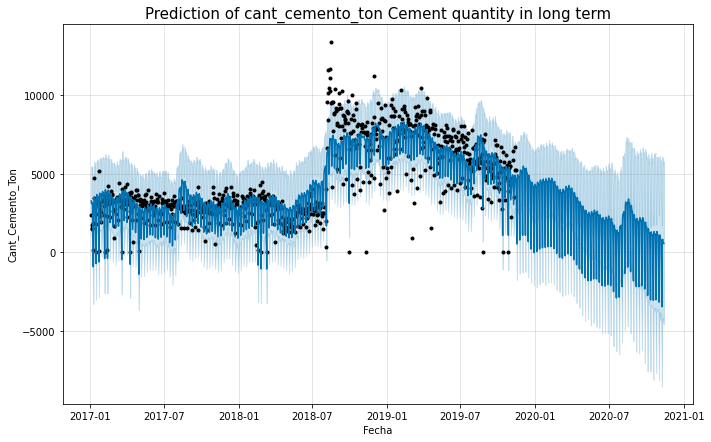

In [42]:
cemT_pred, cemT_plot, cemT_r2, cemT_mse, cemT_mae = predictor(df_T_cemento_Fecha, 'cant_cemento_ton', "Cement quantity", "long term", perds)

In [43]:
cemT_pred.tail(15)

,ds,yhat,yhat_lower,yhat_upper
1232,2020-10-30,1043.891436,-3608.101017,6075.863463
1233,2020-10-31,-742.113597,-5766.547654,4198.518611
1234,2020-11-01,-3175.282688,-8118.494787,2334.858214
1235,2020-11-02,985.229683,-3770.811702,5932.337589
1236,2020-11-03,1103.280343,-4130.224210,6129.626728
1237,2020-11-04,854.603632,-4260.348776,5773.521501
1238,2020-11-05,849.008762,-4325.788583,5857.161915
1239,2020-11-06,765.046299,-3942.162219,5794.742657
1240,2020-11-07,-1031.895891,-5927.977555,3984.352467
1241,2020-11-08,-3469.405610,-8547.816906,1724.897097


### Predicciones para ingresos por cemento 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The prediction for ingresos_net_dolares in Net income in dollars for the next 365 days is:
El r2 es:  0.599117520897486
El MSE es:  9327567812.752651
El MAE es:  68626.96961468291


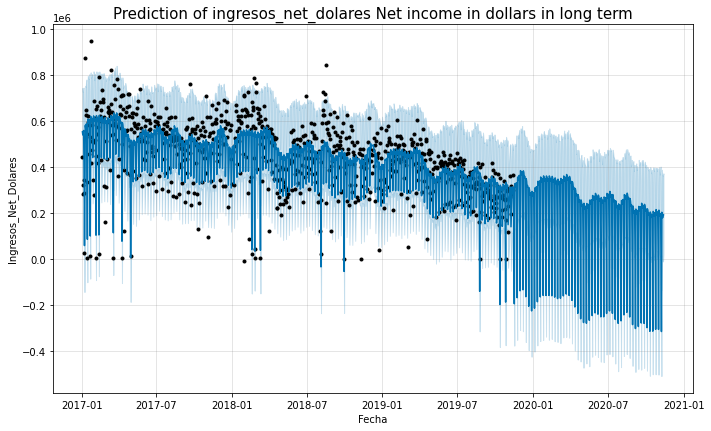

In [44]:
cem_pred, cem_plot, cem_r2, cem_mse, cem_mae = predictor(df_cemento_Fecha, 'ingresos_net_dolares', "Net income in dollars", "long term", perds)

In [45]:
cem_pred.tail(15)

,ds,yhat,yhat_lower,yhat_upper
1232,2020-10-30,204731.992571,5724.260800,390665.178936
1233,2020-10-31,33822.403123,-153794.085273,225550.144981
1234,2020-11-01,-304901.210209,-501048.866701,-111188.007293
1235,2020-11-02,212736.470488,24553.718314,399143.382089
1236,2020-11-03,205967.093278,16344.814077,389352.941037
1237,2020-11-04,187455.665246,10534.304216,367667.218835
1238,2020-11-05,197007.385932,-1986.099676,384815.480228
1239,2020-11-06,196587.192078,15652.655584,401857.266747
1240,2020-11-07,24940.693674,-158209.865487,226389.715172
1241,2020-11-08,-314128.759973,-507346.222196,-132486.889001


# Dependencias

In [3]:
%load_ext watermark

%watermark -v -m -p wget,pandas,numpy,datetime,plotly,scikit-learn,fbprophet,matplotlib,watermark

#Fecha

print(" ")

%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.13.0

wget        : not installed
pandas      : 1.2.3
numpy       : 1.18.4
datetime    : unknown
plotly      : 4.14.3
scikit-learn: 0.23.1
fbprophet   : 0.7.1
matplotlib  : 3.2.1
watermark   : 2.2.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.8.0-44-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Sun Mar 14 2021 21:18:13-05

